In [2]:
import pandas as pd
import numpy as np
import TS_general_library as tsl
import matplotlib.pyplot as plt
import pdb

%load_ext autoreload
%autoreload 2
# pdb.set_trace()  # This sets a breakpoint


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
Prices = pd.read_csv("Price_data.csv", index_col=0) # Upload data
Prices.index = pd.to_datetime(Prices.index.astype(str), format='%Y%m%d')  # Index to DatetimeIndex
returns = Prices.pct_change() # Compute returns

Conditional Sharpe Ratio: 2.6890


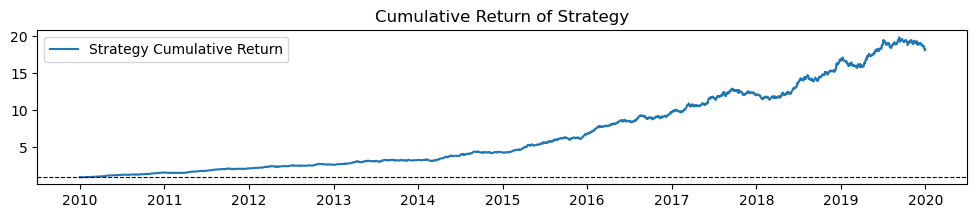

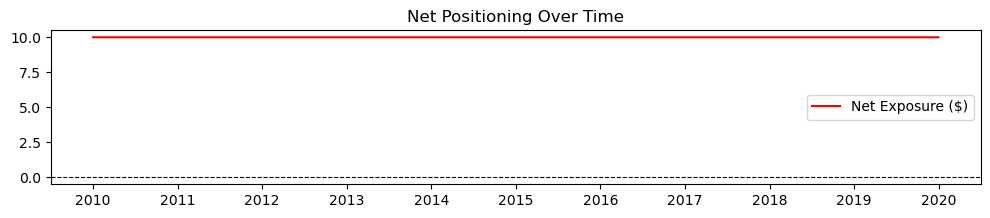

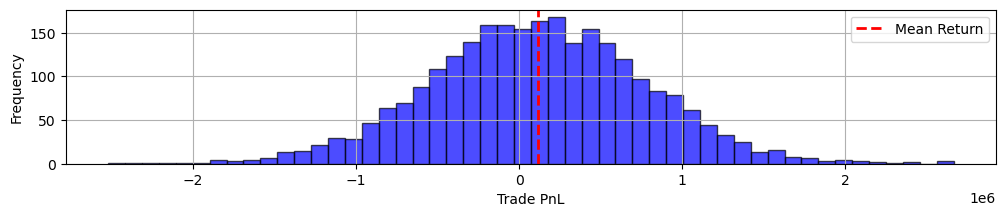

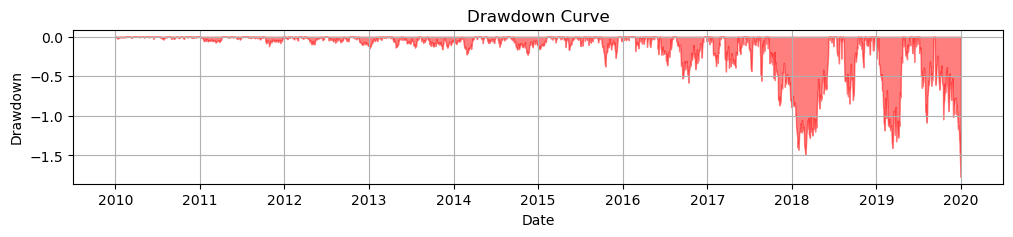

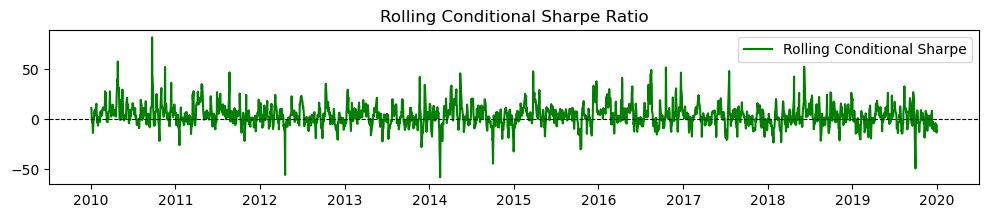

In [4]:
# Parameters
initial_capital = 100_000_000  # $100M
num_assets = Prices.shape[1]
allocation_per_asset = initial_capital / num_assets  # Equal allocation

# Buy price (first available price for each asset)
buy_prices = Prices.iloc[0]

# Number of shares bought for each asset
shares_held = allocation_per_asset / buy_prices

# Compute daily portfolio value
portfolio_values = Prices * shares_held  # Daily marked-to-market value

# Compute daily returns
daily_returns = portfolio_values.sum(axis=1).pct_change().fillna(0)

# Compute cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Track whether positions are open (1 if holding, 0 otherwise)
positions_open = (Prices > 0).astype(int)  # Assumes all assets are always held

# Compute PnL (Profit & Loss)
pnl = daily_returns * initial_capital  # PnL scaled to initial capital

# Compute conditional Sharpe ratio (only when positions are open)
conditional_returns = daily_returns[positions_open.sum(axis=1) > 0]
conditional_sharpe = conditional_returns.mean() / conditional_returns.std() * np.sqrt(252) if len(conditional_returns) > 1 else np.nan

# Compute rolling conditional Sharpe ratio for plotting
rolling_sharpe = conditional_returns.rolling(window=5, min_periods=1).mean() / conditional_returns.rolling(window=5, min_periods=1).std() * np.sqrt(252)

# Create result DataFrame
result = pd.DataFrame({
    'Portfolio Value': portfolio_values.sum(axis=1),
    'Daily Return': daily_returns,
    'Positions Open': positions_open.sum(axis=1) > 0
})

# Print result and conditional Sharpe ratio
print(f"Conditional Sharpe Ratio: {conditional_sharpe:.4f}")

# Call plotting function
tsl.plot_strategy_performance(cumulative_returns, positions_open, pnl, rolling_sharpe)


